# Importations et directories

In [5]:
# import sys
#MOD_DIR = '/home/16012858/g2p_dir/game-learning'

# if MOD_DIR not in sys.path:
#     sys.path.append(MOD_DIR)

import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [6]:
INPUT_DIR = "./data/fifa20_data.csv"

In [7]:
# INPUT_DIR = f"{MOD_DIR}/data/fifa20_data.csv"

# Analyse et pré-processing des données

## Introduction à Fifa

Il s'agit du jeu de sport le plus populaire et nous nous posons la question suivante: est-il possible de créer des profils de footballers à partir de leurs statistiques générales, et de les mettre en relation avec d'autres données telles que leur poste, leur note globale ou encore leur note potentielle?

Dans Fifa, chaque joueur possède une carte avec sa description:

- Statistiques générales (Dribble, tirs etc...)
- Poste
- Note générale

Le détail des différentes statistiques générales est également accessible: accélération, positionnement etc...

Voici un résumé en image:

![Mon image](img_fifa.PNG)

## Exploration de nos données

### Analyse descriptive

La base de données semble beaucoup trop grande et contient des variables pas interessantes:

In [8]:
data = pd.read_csv(INPUT_DIR)
data.head(20)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


Nous enlevons dans un premier temps toutes les variables inutiles (ex: photo, salaire etc...), toutes les variables qui témoignent du collectif (car nous voulons étudier des performances individuelles), ainsi que les variables compliquées à étudier (ex: LS, RS etc... sont les performances des joueurs à chaque poste).

In [9]:
drop_cols = ['Unnamed: 0','ID', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Work Rate']
drop_cols2 = ['Body Type', 'Real Face', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Release Clause']
drop_cols3 = ['LS', 'RS', 'ST', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
data = data.drop(drop_cols+drop_cols2+drop_cols3, axis=1)

Les gardiens étant des joueurs très particuliers, nous n'allons pas les étudier.

In [10]:
drop_cols_GK = ['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
data = data.drop(drop_cols_GK, axis=1)
data = data.drop(data[data['Position'] == 'GK'].index)
data.shape

(16182, 35)

In [11]:
data.isna().sum()

Name                0
Age                 0
Overall             0
Potential           0
Skill Moves        48
Position           60
Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
dtype: int64

48 joueurs ne possèdent pas d'informations sur leurs statistiques: nous pouvons les enlever. De même pour certains joueurs qui n'ont pas d'information sur leur poste.

In [12]:
data = data.dropna()
data.shape

(16122, 35)

In [13]:
data.head(20)

,Name,Age,Overall,Potential,Skill Moves,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,L. Messi,31,94,94,4.0,RF,84.0,95.0,70.0,90.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,Cristiano Ronaldo,33,94,94,5.0,ST,84.0,94.0,89.0,81.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,Neymar Jr,26,92,93,5.0,LW,79.0,87.0,62.0,84.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
4,K. De Bruyne,27,91,92,4.0,RCM,93.0,82.0,55.0,92.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
5,E. Hazard,27,91,91,4.0,LF,81.0,84.0,61.0,89.0,...,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0
6,L. Modrić,32,91,91,4.0,RCM,86.0,72.0,55.0,93.0,...,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0
7,L. Suárez,31,91,91,3.0,RS,77.0,93.0,77.0,82.0,...,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0
8,Sergio Ramos,32,91,91,3.0,RCB,66.0,60.0,91.0,78.0,...,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0
10,R. Lewandowski,29,90,90,4.0,ST,62.0,91.0,85.0,83.0,...,84.0,80.0,39.0,91.0,77.0,88.0,86.0,34.0,42.0,19.0
11,T. Kroos,28,90,90,3.0,LCM,88.0,76.0,54.0,92.0,...,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16122 entries, 0 to 18206
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16122 non-null  object 
 1   Age              16122 non-null  int64  
 2   Overall          16122 non-null  int64  
 3   Potential        16122 non-null  int64  
 4   Skill Moves      16122 non-null  float64
 5   Position         16122 non-null  object 
 6   Crossing         16122 non-null  float64
 7   Finishing        16122 non-null  float64
 8   HeadingAccuracy  16122 non-null  float64
 9   ShortPassing     16122 non-null  float64
 10  Volleys          16122 non-null  float64
 11  Dribbling        16122 non-null  float64
 12  Curve            16122 non-null  float64
 13  FKAccuracy       16122 non-null  float64
 14  LongPassing      16122 non-null  float64
 15  BallControl      16122 non-null  float64
 16  Acceleration     16122 non-null  float64
 17  SprintSpeed 

In [15]:
data.describe()

,Age,Overall,Potential,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
count,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,...,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000
mean,25.005272,66.461233,71.515631,2.532502,54.195013,49.762250,57.065190,62.642724,46.745069,60.590125,...,51.441508,59.581938,50.426994,54.823533,55.468986,52.131001,60.350391,51.313050,51.917256,49.634723
std,4.547106,6.794631,6.074413,0.617823,14.128841,16.377475,11.605909,9.785086,14.781959,12.511927,...,15.729601,14.446229,18.798222,14.675196,12.912500,12.510791,10.148784,17.217843,19.171370,19.169624
min,16.000000,46.000000,48.000000,2.000000,11.000000,10.000000,15.000000,20.000000,10.000000,14.000000,...,11.000000,13.000000,10.000000,11.000000,12.000000,12.000000,22.000000,10.000000,10.000000,10.000000
25%,21.000000,62.000000,67.000000,2.000000,44.000000,36.000000,49.000000,57.000000,35.000000,55.000000,...,40.000000,50.000000,34.000000,46.000000,47.000000,42.000000,53.000000,37.000000,35.000000,32.000000
50%,25.000000,66.000000,71.000000,2.000000,56.000000,52.000000,58.000000,64.000000,47.000000,63.000000,...,54.000000,61.000000,56.000000,57.000000,57.000000,52.000000,61.000000,56.000000,59.000000,56.000000
75%,28.000000,71.000000,75.000000,3.000000,65.000000,63.000000,65.000000,69.000000,58.000000,69.000000,...,64.000000,70.000000,65.000000,65.000000,65.000000,62.000000,68.000000,65.000000,67.000000,65.000000
max,41.000000,94.000000,95.000000,5.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000


### Analyse approfondie

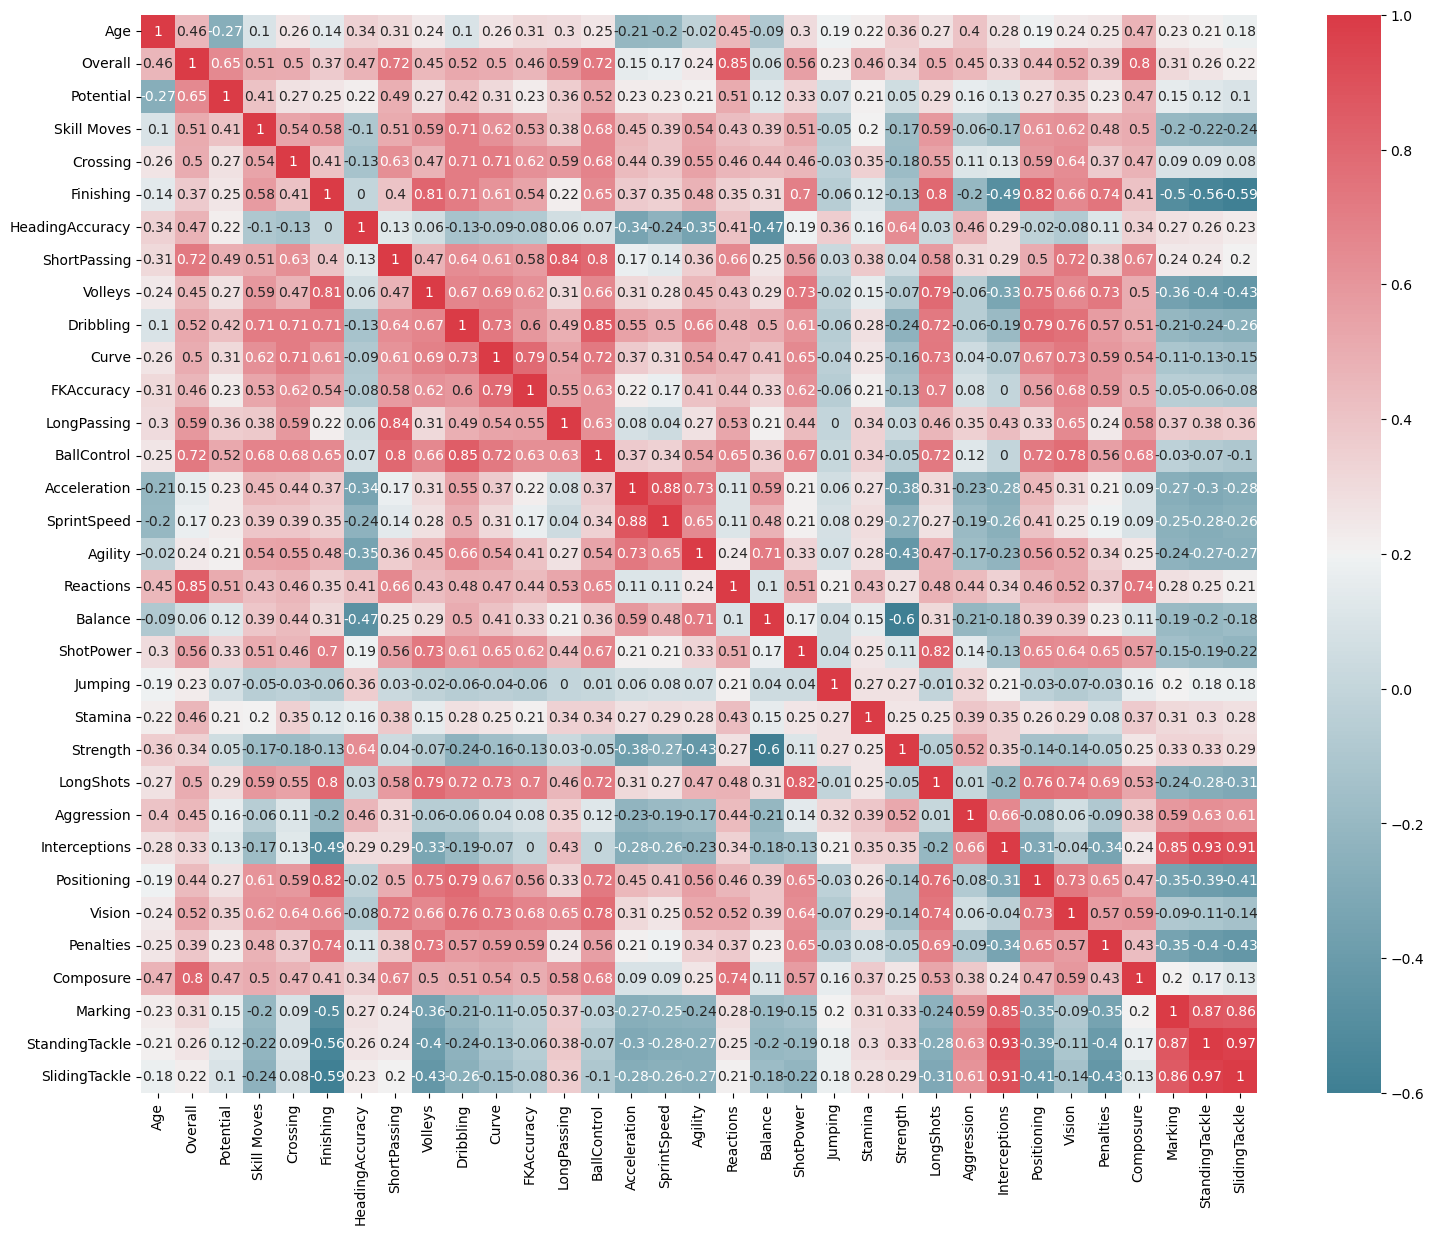

In [16]:
plt.figure(figsize=(18,14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(round(data.corr(),2), cmap=cmap, annot=True)
plt.show()

Les variables StandingTackle (tacle debout), SlidingTackle (tacle glissé) et Interceptions sont très corrélées. Ainsi, on peut décider d'en enlever 2 sur les 3:

In [17]:
drop_cols = ['SlidingTackle', 'StandingTackle']
data = data.drop(drop_cols, axis=1)

/home/luca/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


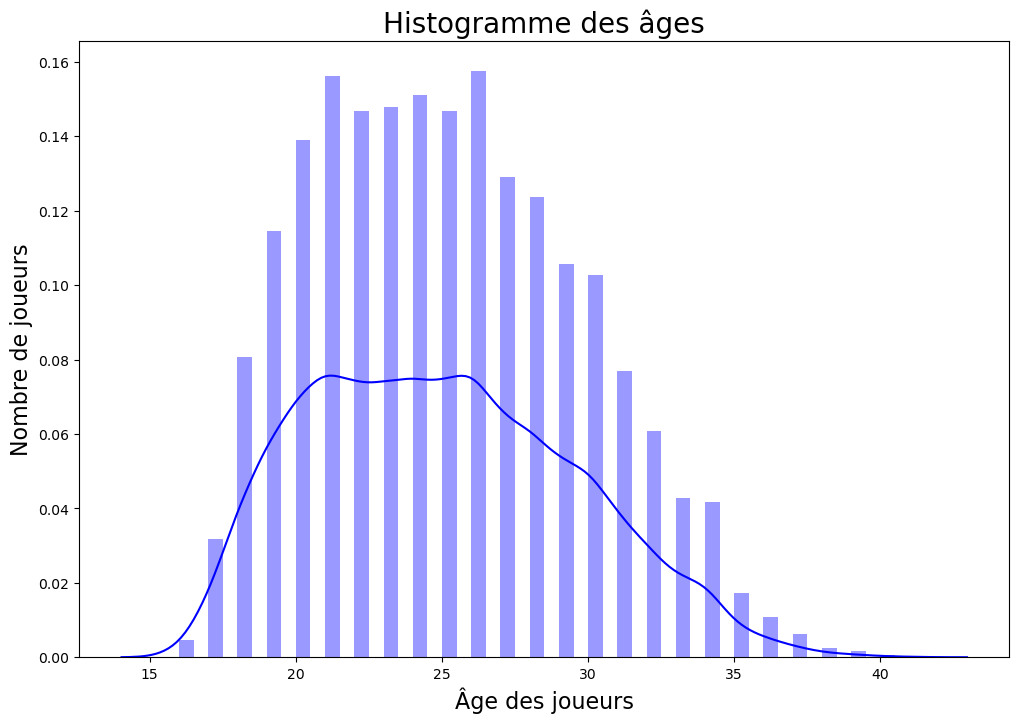

In [18]:
df_age = data.Age
plt.figure(figsize=(12,8))
ax = sns.distplot(df_age, bins = 50, color='b')
ax.set_xlabel(xlabel="Âge des joueurs", fontsize=16)
ax.set_ylabel(ylabel='Nombre de joueurs', fontsize=16)
ax.set_title(label='Histogramme des âges', fontsize=20)
plt.show()

In [19]:
data_players = data.loc[:50,]

fig = px.scatter(data_players, x="Finishing",y="ShotPower",color="Name",text="Name",title="Finishing Vs ShotPower")
fig.update_traces(textposition='top center')
fig.show()

Text(0.5, 1.0, 'Nombre de joueurs')

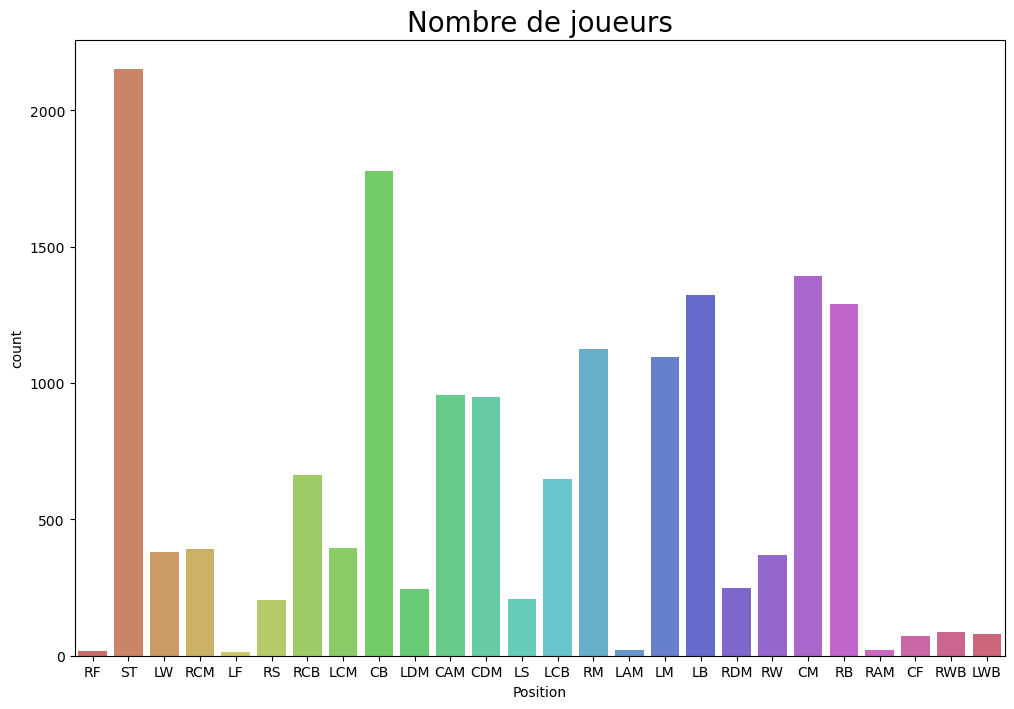

In [20]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x = 'Position', data = data, palette = 'hls')
ax.set_title(label='Nombre de joueurs', fontsize=20)

Voici une dataframe avec les meilleurs joueurs à chaque poste:

In [21]:
best_players = data.loc[data.groupby('Position')['Overall'].idxmax()][['Name', 'Position']]
best_players

,Name,Position
17,A. Griezmann,CAM
12,D. Godín,CB
20,Sergio Busquets,CDM
271,Luis Alberto,CF
67,Thiago,CM
28,J. Rodríguez,LAM
35,Marcelo,LB
24,G. Chiellini,LCB
11,T. Kroos,LCM
14,N. Kanté,LDM


La dataframe suivante permet de mettre en valeur les statistiques les plus importantes pour chaque poste:

In [22]:
data2 = data.loc[:, ~data.columns.isin(["Overall", "Potential"])]
for i, val in data2.groupby('Position').mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(3).index)))
print("\n")

Position CAM: Balance, Agility, Acceleration
Position CB: Strength, Jumping, Aggression
Position CDM: Stamina, Aggression, Strength
Position CF: Agility, Balance, Acceleration
Position CM: Balance, ShortPassing, Agility
Position LAM: Agility, Balance, SprintSpeed
Position LB: SprintSpeed, Acceleration, Stamina
Position LCB: Strength, Jumping, Aggression
Position LCM: Stamina, ShortPassing, Balance
Position LDM: Stamina, ShortPassing, Strength
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, SprintSpeed, Agility
Position LS: SprintSpeed, Strength, Acceleration
Position LW: Acceleration, SprintSpeed, Agility
Position LWB: SprintSpeed, Acceleration, Stamina
Position RAM: Agility, Balance, Acceleration
Position RB: SprintSpeed, Stamina, Acceleration
Position RCB: Strength, Jumping, Aggression
Position RCM: Stamina, ShortPassing, Agility
Position RDM: Stamina, ShortPassing, Aggression
Position RF: Agility, Acceleration, Balance
Position RM: Acceleration, SprintSpeed, A

Text(0.5, 1.0, 'Relation entre dribble et duel remporté et comparaison avec la finition')

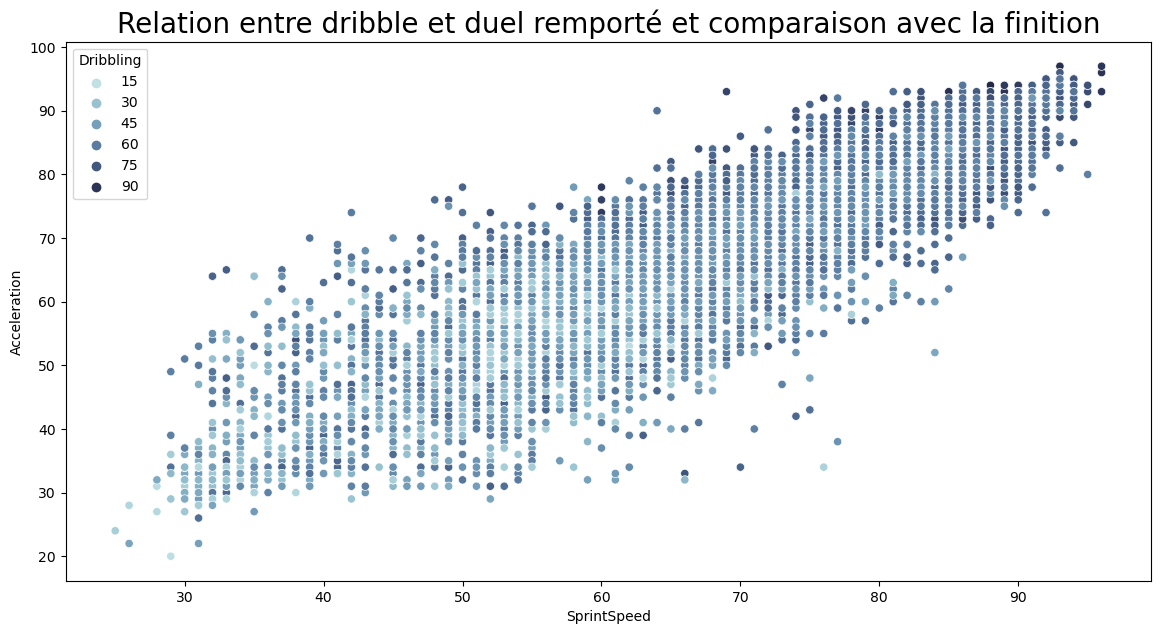

In [23]:
plt.figure(figsize=(14,7))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

ax = sns.scatterplot(x='SprintSpeed', y='Acceleration',
                     hue='Dribbling',
                     palette=cmap, sizes=(1, 1),
                     data=data)
ax.set_title(label='Relation entre dribble et duel remporté et comparaison avec la finition', fontsize=20)

Il semblerait que les joueurs les plus rapides soient ceux avec la meilleure accélération. Les joueurs bons dribbleurs sont généralement parmi les plus rapides et ayant une bonne accélération.

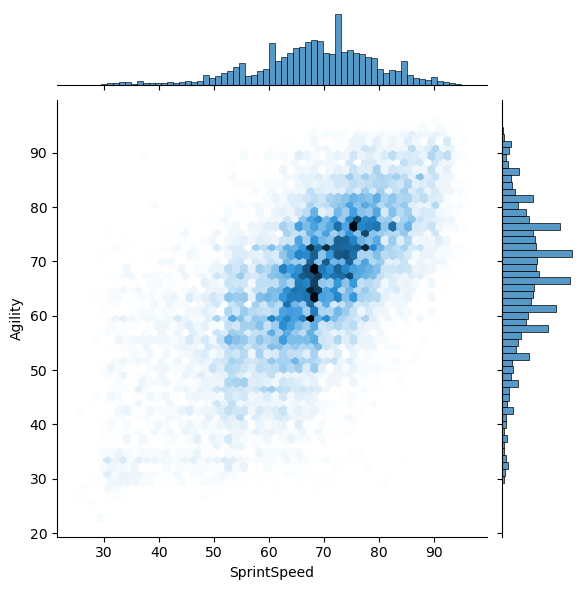

In [24]:
sns.jointplot(x=data['SprintSpeed'], y=data['Agility'], kind = "hex")

## Construction de notre jeu de données final

In [25]:
X = data.loc[:, ~data.columns.isin(["Overall", "Potential", "Position"])]
y = data[["Overall", "Potential", "Position"]]
X.head()

,Name,Age,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking
0,L. Messi,31,4.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,...,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0
1,Cristiano Ronaldo,33,5.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,...,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0
2,Neymar Jr,26,5.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,...,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0
4,K. De Bruyne,27,4.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,...,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0
5,E. Hazard,27,4.0,81.0,84.0,61.0,89.0,80.0,95.0,83.0,...,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0


In [26]:
y.head()

,Overall,Potential,Position
0,94,94,RF
1,94,94,ST
2,92,93,LW
4,91,92,RCM
5,91,91,LF


Il nous reste donc deux bases de données:
- X contenant le nom de chaque joueur et les statistiques individuelles associées
- y contenant des variables qui ne doivent pas être prises en compte dans le clustering mais qui seront intéressantes pour l'interprétation

L'âge est gardé parmi nos variables explicatives en tant qu'indicateur de l'expérience du joueur.

# Clustering

## K-means

/home/luca/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f78ab346a60>
Traceback (most recent call last):
  File "/home/luca/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/luca/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/luca/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/luca/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
  

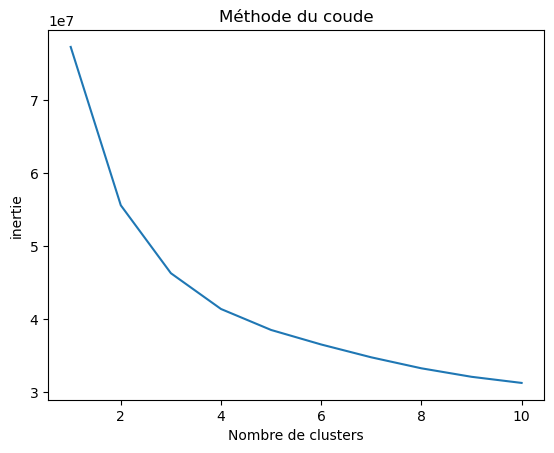

In [27]:
X_without_names = X.iloc[:, 1:]
inertie=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X_without_names)
    inertie.append(kmeans.inertia_)     
plt.plot(range(1,11), inertie,)
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('inertie')
plt.show() 


Nous pouvons choisir un nombre de clusters égal à 4.

In [28]:
kmeansmodel = KMeans(n_clusters=4 , init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X_without_names)
labels = kmeansmodel.labels_
y["cluster_kmean"] = labels
clusters = pd.DataFrame()
clusters["kmean"] = labels

/home/luca/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f78ac38daf0>
Traceback (most recent call last):
  File "/home/luca/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/luca/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/luca/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/luca/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
  

## Classification ascendante hiérarchique (CAH)

## Clustering spectral

In [34]:
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', assign_labels='kmeans')
labels = spectral.fit_predict(X_without_names)
clusters["spectral"] = labels

# Évaluer la qualité des clusters avec l'indice de silhouette
silhouette_avg = silhouette_score(X_without_names, labels)
print("Silhouette Score:", silhouette_avg)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f78ac2a2af0>
Traceback (most recent call last):
  File "/home/luca/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/luca/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/luca/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/luca/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_modul

Silhouette Score: 0.17397978828519786


Le coefficient de silhouette est une mesure de qualité de clustering qui évalue à la fois la compacité des points d'un cluster et la séparation des clusters. Un coefficient de silhouette élevé indique que les points sont bien regroupés dans leurs clusters respectifs et qu'ils sont séparés les uns des autres. Un coefficient de silhouette faible indique que les points sont mal regroupés, qu'ils sont trop proches les uns des autres ou qu'ils se chevauchent.

Le coefficient de silhouette varie entre -1 et 1. Un coefficient de silhouette de 1 indique une bonne séparation entre les clusters et une forte cohérence à l'intérieur de chaque cluster. Un coefficient de silhouette de 0 indique que les clusters se chevauchent et que les points sont répartis de manière uniforme entre eux. Un coefficient de silhouette négatif indique que les points sont attribués à des clusters incorrects.

Un coefficient de silhouette inférieur à 0,2 comme le notre est considéré comme faible.

In [35]:
db_index = davies_bouldin_score(X_without_names, labels)
print(db_index)

1.5474976965521212


L'indice de Davies-Bouldin calcule la similarité entre les clusters voisins. Un indice de Davies-Bouldin plus petit indique que les clusters sont bien séparés, tandis qu'un indice de Davies-Bouldin plus grand peut indiquer que les clusters se chevauchent ou sont trop similaires.

Notre indice de Davies-Bouldin est au-dessus de 1, ce qui indique une mauvaise qualité de clustering.

# Anayse des résultats de clustering

## K-means

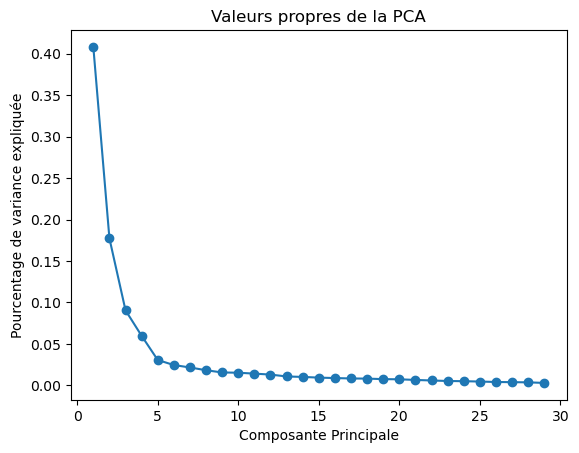

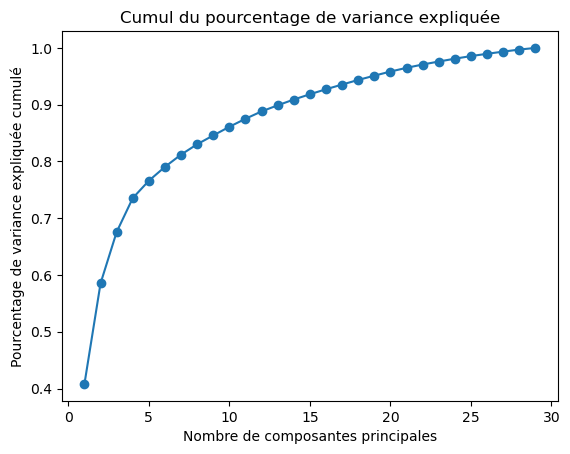

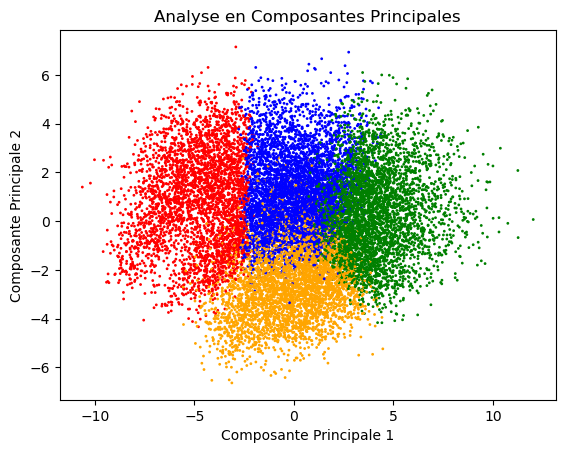

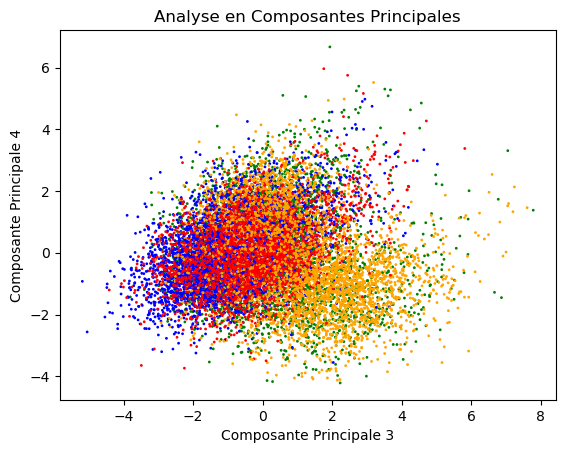

In [29]:
X_scaled = (X_without_names - X_without_names.mean()) / X_without_names.std()

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

labels = y["cluster_kmean"]
df_pca = pd.DataFrame({'x': X_pca[:, 0], 'y': X_pca[:, 1], 'label': labels})
df_pca_2 = pd.DataFrame({'x': X_pca[:, 2], 'y': X_pca[:, 3], 'label': labels})

colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange'}

df_pca['color'] = [colors[label] for label in np.array(labels)]
df_pca_2['color'] = [colors[label] for label in np.array(labels)]

# graphique des valeurs propres
fig, ax = plt.subplots()
ax.plot(np.arange(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
ax.set_xlabel('Composante Principale')
ax.set_ylabel('Pourcentage de variance expliquée')
ax.set_title('Valeurs propres de la PCA')
plt.show()

# graphique du cumul du pourcentage de variance expliquée
fig, ax = plt.subplots()
ax.plot(np.arange(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), marker='o')
ax.set_xlabel('Nombre de composantes principales')
ax.set_ylabel('Pourcentage de variance expliquée cumulé')
ax.set_title('Cumul du pourcentage de variance expliquée')
plt.show()

#pca 1
fig, ax = plt.subplots()
ax.scatter(df_pca['x'], df_pca['y'], c=df_pca['color'], s=1)
ax.set_xlabel('Composante Principale 1')
ax.set_ylabel('Composante Principale 2')
ax.set_title('Analyse en Composantes Principales')
plt.show()

#pca 2
fig, ax = plt.subplots()
ax.scatter(df_pca_2['x'], df_pca_2['y'], c=df_pca_2['color'], s=1)
ax.set_xlabel('Composante Principale 3')
ax.set_ylabel('Composante Principale 4')
ax.set_title('Analyse en Composantes Principales')
plt.show()

Les quatre premières composantes principales expliquent ensemble plus de 70% de la variance totale dans les données. Nous devons donc considérer les 4 premières composantes principales.
Le deuxième graphique de PCA confond beaucoup plus les clusters que le premier graphique.

In [30]:
positions = y['Position'].unique()

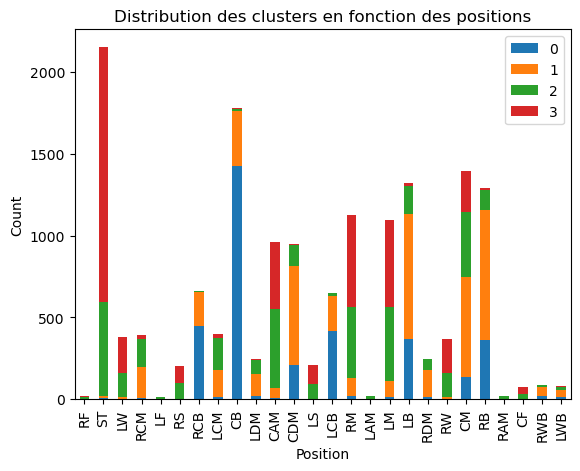

In [31]:
freq_matrix = pd.DataFrame(index=positions, columns=range(4))
for i in range(4):
    freq_table = pd.crosstab(y[y['cluster_kmean'] == i]['Position'], columns='count')
    freq_table = freq_table.reindex(positions)
    freq_matrix[i] = freq_table.values
freq_matrix.plot(kind='bar', stacked=True)
plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Distribution des clusters en fonction des positions')
plt.show()

Pour pouvoir mieux comparer les clusters en fonction des notes globales des joueurs (Overall), nous allons attribuer à chaque joueur une note de niveau. Il y aura 4 niveaux: 0, 1, 2 et 3. Les niveaux sont attribués de sorte à ce qu'on ait le même nombre de joueurs par niveau. 

In [32]:
def map_valeur(overall):
    if 46 <= overall <= 62:
        return 0
    elif 62 < overall <= 66:
        return 1
    elif 66 < overall <= 71:
        return 2
    elif 71 < overall <= 94:
        return 3
    else:
        return overall

y["Level"] = y["Overall"].apply(lambda x: map_valeur(x))

/tmp/ipykernel_101081/4090367436.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



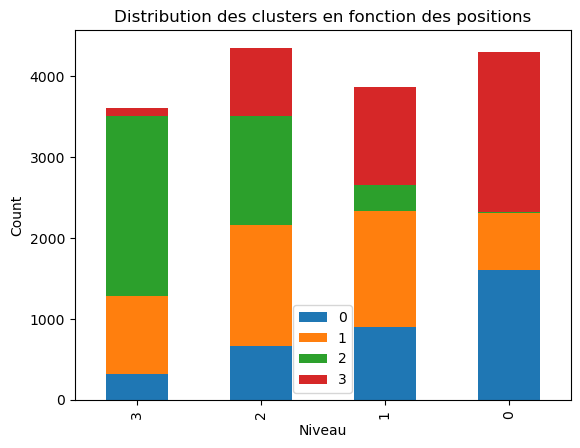

In [33]:
niveaux = y['Level'].unique()
freq_matrix = pd.DataFrame(index=niveaux, columns=range(4))
for i in range(4):
    freq_table = pd.crosstab(y[y['cluster_kmean'] == i]['Level'], columns='count')
    freq_table = freq_table.reindex(niveaux)
    freq_matrix[i] = freq_table.values
freq_matrix.plot(kind='bar', stacked=True)
plt.xlabel('Niveau')
plt.ylabel('Count')
plt.title('Distribution des clusters en fonction des positions')
plt.show()

On remarque 3 gradients:
- un gradient positif de cluster 0 depuis les hautes notes générales (niveau = 3) vers les faibles notes (niveau = 0).
- un gradient négatif de cluster 2 depuis les hautes notes générales vers les faibles notes.
- un gradient positif de cluster 3 depuis les hautes notes générales vers les faibles notes.

Le cluster 1 semble présent de manière assez homogène à tous les niveaux.

## CAH

## Clustering spectral

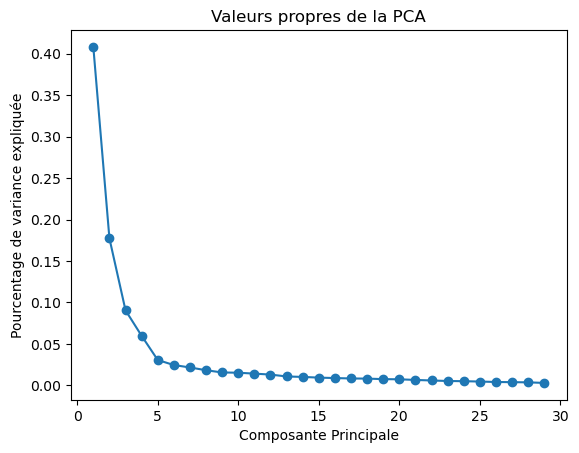

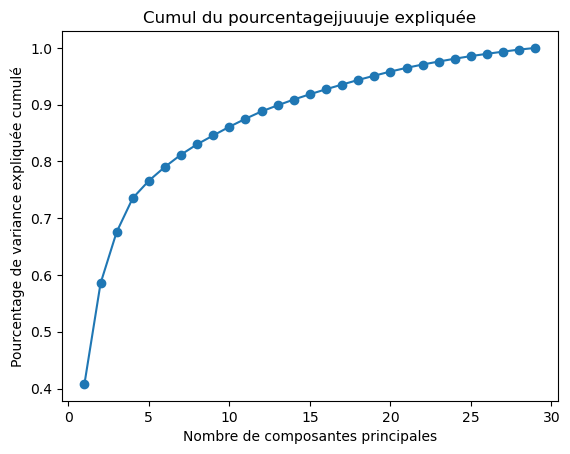

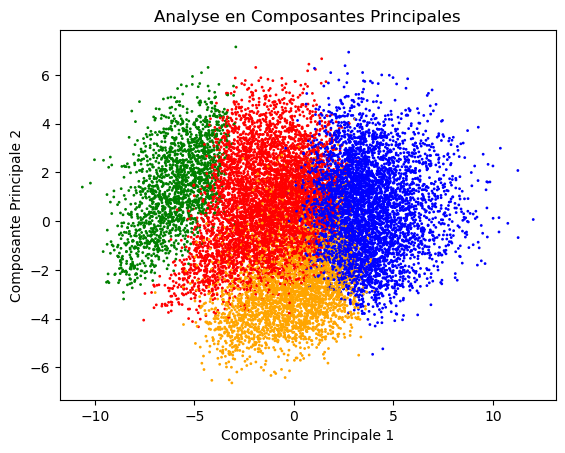

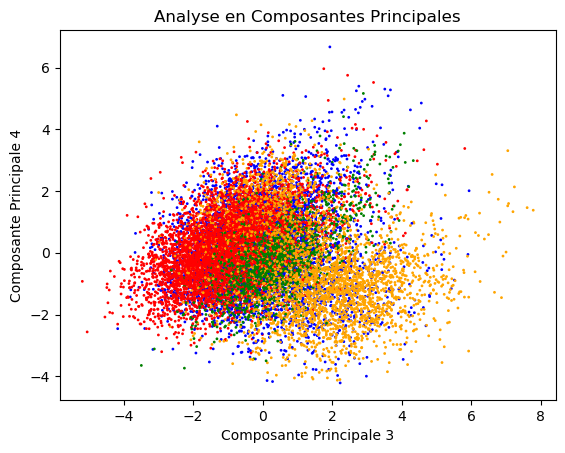

In [36]:
labels = clusters["spectral"]
df_pca = pd.DataFrame({'x': X_pca[:, 0], 'y': X_pca[:, 1], 'label': labels})

colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange'}

df_pca['color'] = [colors[label] for label in np.array(labels)]
df_pca_2['color'] = [colors[label] for label in np.array(labels)]

# graphique des valeurs propres
fig, ax = plt.subplots()
ax.plot(np.arange(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
ax.set_xlabel('Composante Principale')
ax.set_ylabel('Pourcentage de variance expliquée')
ax.set_title('Valeurs propres de la PCA')
plt.show()

# graphique du cumul du pourcentage de variance expliquée
fig, ax = plt.subplots()
ax.plot(np.arange(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), marker='o')
ax.set_xlabel('Nombre de composantes principales')
ax.set_ylabel('Pourcentage de variance expliquée cumulé')
ax.set_title('Cumul du pourcentagejjuuuje expliquée')
plt.show()

#pca 1
fig, ax = plt.subplots()
ax.scatter(df_pca['x'], df_pca['y'], c=df_pca['color'], s=1)
ax.set_xlabel('Composante Principale 1')
ax.set_ylabel('Composante Principale 2')
ax.set_title('Analyse en Composantes Principales')
plt.show()

#pca 2
fig, ax = plt.subplots()
ax.scatter(df_pca_2['x'], df_pca_2['y'], c=df_pca_2['color'], s=1)
ax.set_xlabel('Composante Principale 3')
ax.set_ylabel('Composante Principale 4')
ax.set_title('Analyse en Composantes Principales')
plt.show()